In [4]:
#패키지 불러오기
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as pit
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [5]:
#데이터프레임으로 데이터 읽어오기
df = pd.read_csv("data/titanic.csv", index_col='PassengerId') #인덱스를 PassengerId로 지정
#df = df.set_index('PassengerId') 이거 쓸 수도 있음
print(df.shape)
df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Sex 칼럼에서 male 을 1로, female 을 0으로 바꾸기
df["Sex"] = df.Sex.map({"male":1,"female":0})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
#[전처리 시작]
#필요없는 칼럼 제거하기
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)
#axis 는 종으로 제거할지 힝으로 제거할지 옵션을 줌, 1은 수직
#제거 확인
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,NaN,1,2,23.4500


In [8]:
#결측치값을 Medium(중간값)으로 변경
#나이가 없는 데이터는 중간값으로 채우자
#df의 Age 칼럼의 Na 값을 Median 으로 바꾸기, Inplace 는 True
df.Age.fillna(df.Age.median(), inplace=True)

In [9]:
#Null 값을 나머지 값의 중간값으로 변경하기 전에 Null값이 몇개인지 확인
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
#X값을 Pclass ~ Fare 등 변수로 집어넣고
#Y값은 output 변수
X = np.array(df.iloc[:,1:]) #모든 행 집어넣기 및 1~마지막까지 열 집어넣기, 요소데이터
Y = np.array(df['Survived']) #결과데이터

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,28.0,1,2,23.4500


In [12]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [13]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [14]:
#모델 적합
#트레이닝 셋트와 테스트 셋트로 데이터 구분(여기서는 7:3으로 구분)
#이건 답을 알려줬으니 지도학습이구만!
from sklearn.model_selection import train_test_split

#random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#random_state : 랜덤으로 뽑는 방식 지정

#통으로 된 걸 X,Y 로 나누고 train 과 test 로 나누는 작업

#[훈련데이터] : 이걸로 어떤 정보의 사람이 살았고 죽었는지를 훈련시킴88
#X_train : 승객들의 인적정보
print("X_train 크기:", X_train.shape)
#Y_train :승객들의 생존정보
print("Y_train 크기:", Y_train.shape)

#[테스트데이터] : 이걸로 훈련된 값으로 만든 모델에 X_test 를 넣어 Y_test 를 출력하고자 함
#X_test : 승객들의 인적정보
print("X_test 크기:", X_test.shape)
#Y_test : 승객들의 생존정보 =
print("Y_test 크기:", Y_test.shape)

X_train 크기: (623, 6)
Y_train 크기: (623,)
X_test 크기: (268, 6)
Y_test 크기: (268,)


In [15]:
#
from sklearn.tree import DecisionTreeClassifier

#fit 는 적합시킨다는 의미 (학습시킬 때는 train 만 씀)
tree = DecisionTreeClassifier(random_state=0) #max_depth 미지정

#훈련 데이터로 의사결정나무 모델을 훈련시킴
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
#4. 모델 성능평가

#의사결정나무가 X값으로 Y값을 예측하도록 함

temp_y_pred = tree.predict(X_test)

#x 테스트를 가지고 예측한 결과가 y 트레인과 얼마나 맞는지 평가
#저장된 값은 실제 진행된 결과값이 저장되는 곳 > temp

# Training 값을 X_test 에서 넣음
print("예측값\n", temp_y_pred) #살았는지 죽었는지 예측
print("실제값\n", Y_test) #실제 살았는지 죽었는지 값

#모델의 성능을 좌우하면

예측값
 [0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
실제값
 [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1

In [17]:
#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#실제 값과 예측값 간 정확도 계산
temp_acc = accuracy_score(Y_test, temp_y_pred)

#y_test 
#temp_pred (예측한 걸 넣어둔 거랑) ytest (실제 결과) 사이의 정확도를 계산함

print('정확도: ', format(temp_acc))

정확도:  0.8022388059701493


In [18]:
#오차행렬(COnfusion Matrix) //살았는데 죽었다고 한 경우나 죽었는데 살았다고 한 경우
print(confusion_matrix(Y_test, temp_y_pred))

#왼쪽 위와 우측 아래가 잘 맞춘 경우(TT, TN))

[[147  21]
 [ 32  68]]


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

#정확도 계산 메소드
print('정확도: ', accuracy_score(Y_test, temp_y_pred))
print('Precision: ', precision_score(Y_test, temp_y_pred))
print('recall:', recall_score(Y_test, temp_y_pred))
print('f1: ', f1_score(Y_test, temp_y_pred))

정확도:  0.8022388059701493
Precision:  0.7640449438202247
recall: 0.68
f1:  0.7195767195767195


In [20]:
#모델 성능 종합 평가

print(classification_report(Y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       168
           1       0.76      0.68      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [21]:
#분류를 잘 하는지 테스트해보자
#새로운 array 하나를 넣어서 Y값 출력해보기
tree.predict([[1, 0, 20, 2, 2, 10]]) #list 안의 list
#객실등급, 성별(1/0), 나이, 형제자매와 배우자수, 부모자녀수, 운임 입력

array([1], dtype=int64)

In [22]:
#1은 살았다는 의미

----------------------------------------

# 여기서부터 ROC 실습

In [27]:
tree.predict_proba(X_test)
#좌측은 사망확률, 우측은 생존확률

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [24]:
tree.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.125     , 1.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.5       , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.     

## ROC 커브 생성

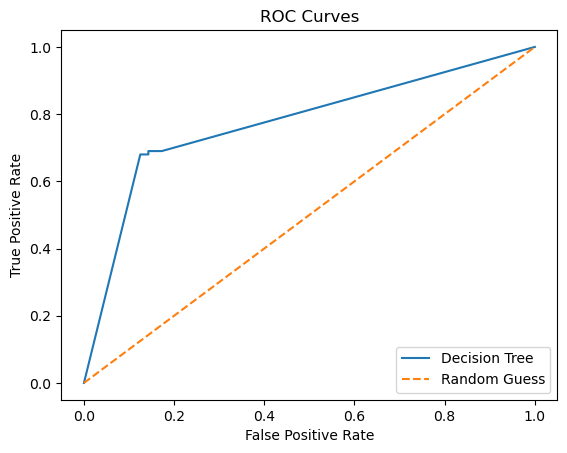

In [25]:
from sklearn.metrics import roc_curve
#fpr 이 X값, tpr 이 Y값
# FPR : 잘못맞춤, 진짜라고, 그 비율
# TPR : 잘 맞춤, 진짜라고, 그 비율
fpr, tpr, thresholds = roc_curve(Y_test, tree.predict_proba(X_test)[:,1])

#ROC Curve 그래프 그리기
from matplotlib import pyplot as plt

#fpr 을 X축, tpr 를 Y축으로 그림
plt.plot(fpr, tpr, '-', ms=2, label="Decision Tree")
#랜덤으로 맞출 때(ROC가 0.5)일대
plt.plot([0,1],[0,1], '--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### 이 모델은 FPR(진짜라고 잘못 판단한 비율)의 증가량보다 TPR(진짜라고 맞게 판단한 비율)의 증가량이 더 크므로 랜덤으로 맞춘 것보다 좋은 모델이라 할 수 있다.

In [26]:
#AUC 계산
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Curve : %0.2f' % roc_auc)

Area Under Curve : 0.77


#### 랜덤으로 맞출 때인 0.5 보다 0.27가량 ROC 커브 아래의 영역이 크므로 무작위모델보다 우수하다.